In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
torch.__version__


'2.1.1'

In [2]:
weight = 0.7
bias = 0.3


start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias
X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [3]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

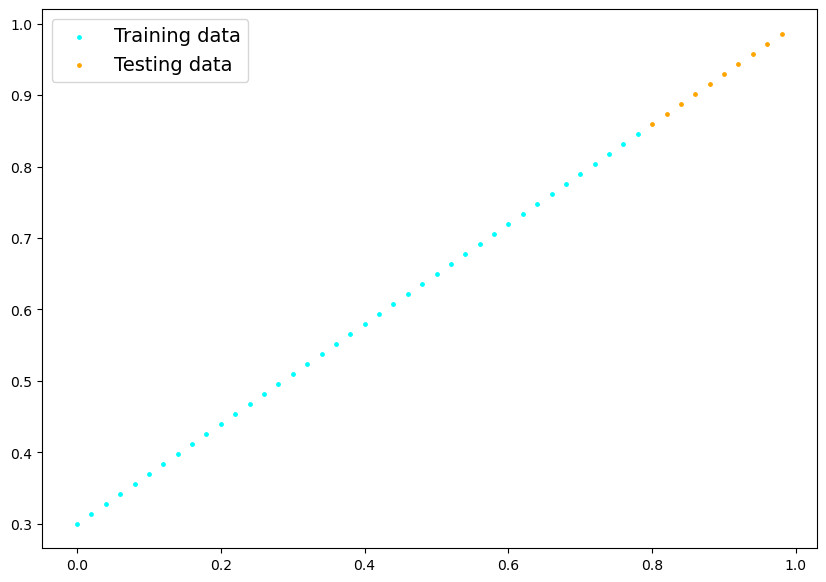

In [4]:
def plot_predictions(train_data = X_train, 
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="cyan", s=6, label="Training data")
    plt.scatter(test_data, test_labels, c="orange", s=6, label="Testing data")
    if (predictions is not None):
        plt.scatter(test_data, predictions, c="r", s=6, label="Predictions")

    plt.legend(prop={"size": 14});

plot_predictions()
    

In [5]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        # 使用随机tensor初始化权重与偏置
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
        
        # 定义前向传播方法，x是输入数据
    def forward(self, x: torch.Tensor) -> torch.Tensor:
            return self.weights * x + self.bias




In [6]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [7]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [8]:
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

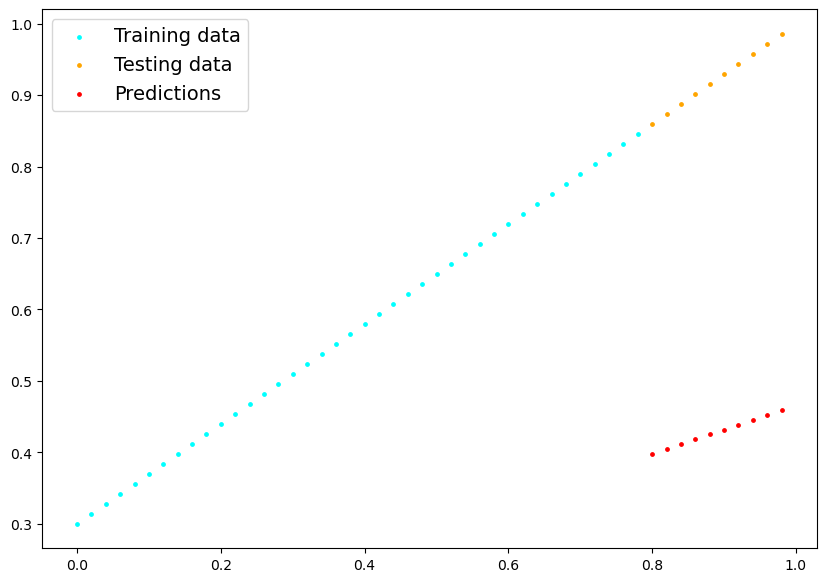

In [9]:
plot_predictions(predictions=y_preds)

In [10]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
# Set up a loss function
loss_fn = nn.L1Loss()


optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.001)




In [12]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [13]:
torch.manual_seed(42)
epochs = 1000
for epoch in range(epochs):
    model_0.train() # train mode in pytorch set
    y_pred = model_0(X_train)
    loss = loss_fn(y_pred, y_train)
    print(f"Loss: {loss}")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_0.eval()

    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} Loss: {loss} Test Loss {test_loss}")
        print(model_0.state_dict())
        



Loss: 0.31288138031959534
Epoch: 0 Loss: 0.31288138031959534 Test Loss 0.4931890368461609
OrderedDict([('weights', tensor([0.3371])), ('bias', tensor([0.1298]))])
Loss: 0.3117292523384094
Loss: 0.3105771541595459
Loss: 0.3094250559806824
Loss: 0.30827295780181885
Loss: 0.3071208596229553
Loss: 0.3059687614440918
Loss: 0.3048166334629059
Loss: 0.30366456508636475
Loss: 0.3025124669075012
Loss: 0.3013603389263153
Epoch: 10 Loss: 0.3013603389263153 Test Loss 0.4797181189060211
OrderedDict([('weights', tensor([0.3410])), ('bias', tensor([0.1398]))])
Loss: 0.30020827054977417
Loss: 0.29905614256858826
Loss: 0.2979040741920471
Loss: 0.2967519164085388
Loss: 0.29559987783432007
Loss: 0.29444774985313416
Loss: 0.293295681476593
Loss: 0.2921435832977295
Loss: 0.2909914553165436
Loss: 0.28983938694000244
Epoch: 20 Loss: 0.28983938694000244 Test Loss 0.4662471413612366
OrderedDict([('weights', tensor([0.3449])), ('bias', tensor([0.1498]))])
Loss: 0.28868725895881653
Loss: 0.287535160779953
Loss: 

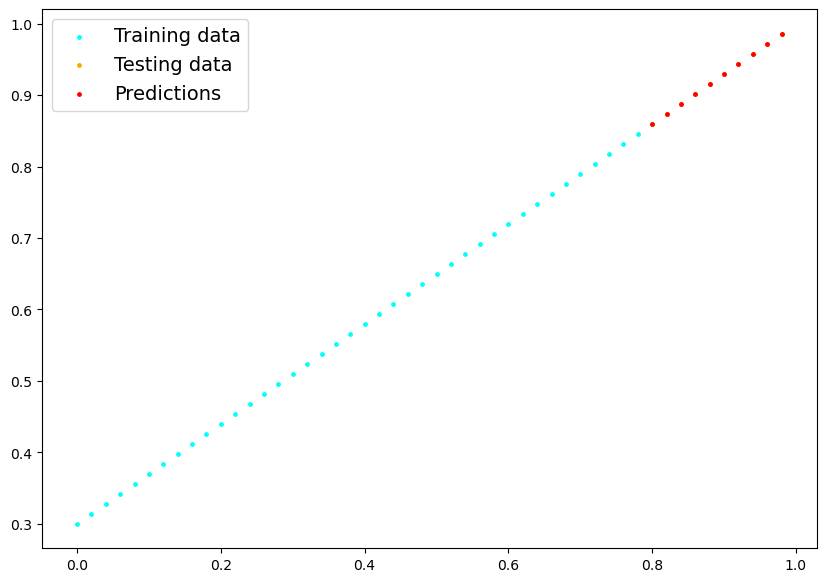

In [30]:
plot_predictions(predictions=test_pred)

In [31]:
## saving a model in pytorch
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

PosixPath('models/01_pytorch_workflow_model_0.pth')

In [32]:
torch.save(model_0.state_dict(), MODEL_SAVE_PATH)

In [33]:
!ls -l models

total 8
-rw-r--r--  1 zowcool  staff  1680 Dec  3 12:59 01_pytorch_workflow_model_0.pth


In [34]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [35]:
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])

In [14]:
## Putting it all together
import torch
from torch import nn
import matplotlib.pyplot as plt

print(torch.__version__)

weight = 0.7
bias = 0.2

start = 0
end = 1
step = .02

print(step)


X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

print(X,y)

train_split = int(0.8 * len(X))
X_train,y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
print(len(X_train), len(y_train), len(X_test), len(y_test))

class LinearRegressionModelV2(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
print(model_1, model_1.state_dict())
model_1.to("mps")
next(model_1.parameters()).device

## Traning
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(),lr = 0.001)
torch.manual_seed(42)
epochs = 2000
# put data on the mps
X_train = X_train.to("mps")
y_train = y_train.to("mps")
X_test = X_test.to("mps")
y_test = y_test.to("mps")
for epoch in range(epochs):
    model_1.train()
    y_pred = model_1(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, y_test)
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")



2.1.1
0.02
tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]]) tensor([[0.2000],
        [0.2140],
        [0.2280],
        [0.2420],
        [0.2560]

/Users/zowcool/anaconda3/lib/python3.11/site-packages/torch/autograd/__init__.py:251: UserWarning: The operator 'aten::sgn.out' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1699448804225/work/aten/src/ATen/mps/MPSFallback.mm:13.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch: 0 | Loss: 0.6551779508590698 | Test Loss: 0.68610018491745
Epoch: 100 | Loss: 0.5399694442749023 | Test Loss: 0.5513920187950134
Epoch: 200 | Loss: 0.4247610569000244 | Test Loss: 0.41668397188186646
Epoch: 300 | Loss: 0.3095526099205017 | Test Loss: 0.2819758355617523
Epoch: 400 | Loss: 0.1943441480398178 | Test Loss: 0.14726769924163818
Epoch: 500 | Loss: 0.0791357085108757 | Test Loss: 0.012559592723846436
Epoch: 600 | Loss: 0.03021085262298584 | Test Loss: 0.058072078973054886
Epoch: 700 | Loss: 0.02602802775800228 | Test Loss: 0.05937190726399422
Epoch: 800 | Loss: 0.022560965269804 | Test Loss: 0.05267716199159622
Epoch: 900 | Loss: 0.019125869497656822 | Test Loss: 0.04467792436480522
Epoch: 1000 | Loss: 0.015691835433244705 | Test Loss: 0.03661002591252327
Epoch: 1100 | Loss: 0.012256964109838009 | Test Loss: 0.028610795736312866
Epoch: 1200 | Loss: 0.008822708390653133 | Test Loss: 0.020542895421385765
Epoch: 1300 | Loss: 0.005388063844293356 | Test Loss: 0.012543666176

In [15]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6990]], device='mps:0')),
             ('linear_layer.bias', tensor([0.1995], device='mps:0'))])

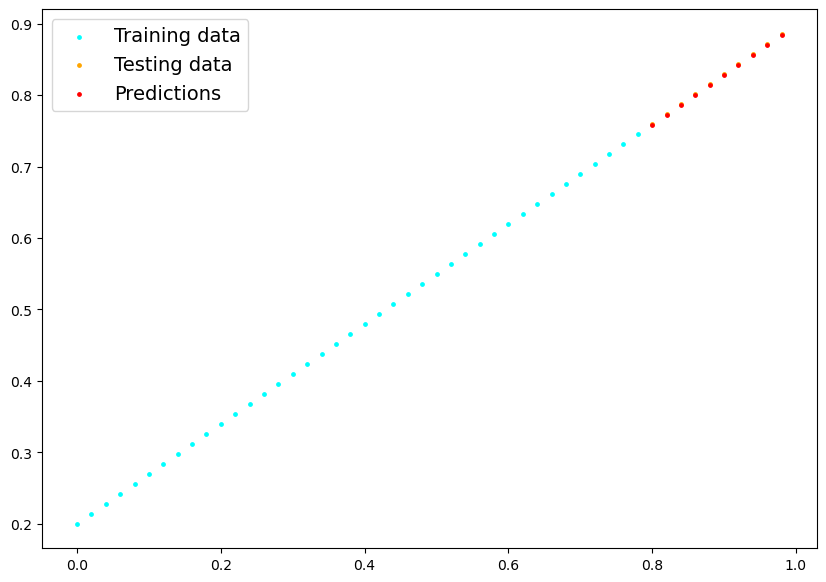

In [19]:
model_1.eval()
with torch.inference_mode():
    y_preds = model_1(X_test)
plot_predictions(predictions=y_preds.cpu())

In [ ]:
#